### Examples for creating graphs

- From set of vertices and set of edges
- From adjacency list
- From adjacency matrix

Show for both directed and undirected graphs

---

Create undirected graphs and directed graphs from vertex set and edge set

**Undirected Graphs.** In an undirected graph, edges have no direction; edges are simply connections between pairs of nodes. When we plot them, the edges appear as simple lines without arrows.


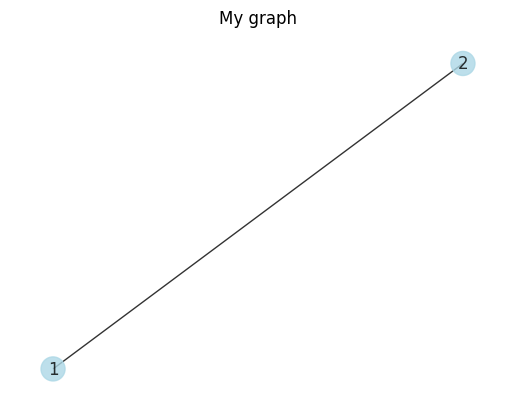

In [1]:
import network_utilities as nu
import plotting_utilities as pu

G = nu.vertex_edge_sets_to_graph({1, 2}, {(1, 2)})
pu.show_graph(G)


**Directed Graphs.**
In a directed graph, edges have direction—they point from one node to another. When we plot them, arrows indicate the direction of the edge. Notice that we are plotting edges with a slight curve so that when two nodes are connected by directed edges in opposite directions (e.g., an edge from A→B and another from B→A), both arrows are clearly visible.


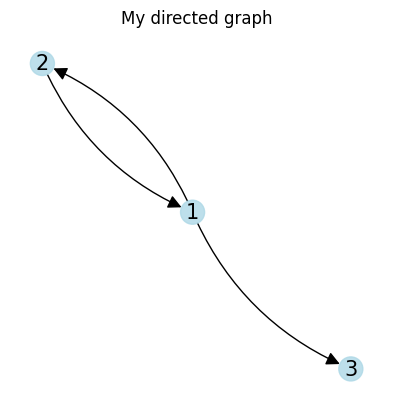

In [2]:
G = nu.vertex_edge_sets_to_digraph({1, 2, 3}, {(1, 2), (2, 1), (1, 3)})
pu.show_digraph(G)


---

Create undirected and directed graphs from adjacency list. Violate some of the requirements for graphs or adjacency lists and make sure correct error messages occur.

Graphs can have an empty edge set (no edges), but they cannot have an empty vertex set (no vertices). The utilities below try to check this constraint.


In [3]:
import pytest
from network_utilities import IllegalGraphRepresentation

## Error conditions: empty adjacency list
with pytest.raises(IllegalGraphRepresentation) as exc_info:
    _ = nu.adjacency_list_to_graph(dict())

assert str(exc_info.value) == "Adjacency list had no vertices"
print(f"Passed: raised IllegalGraphRepresentation with message\n\t{str(exc_info.value)}")


Passed: raised IllegalGraphRepresentation with message
	Adjacency list had no vertices


Notice how this example _raises_ the `IllegalGraphRepresentation` error.

For an undirected graph, the adjacency list must be symmetric: if there is an edge from vertex $a$ to vertex $b$, then there must also be an edge from vertex $b$ to vertex $a$.


In [4]:
## incorrect adjacency list: missing edges in undirected graph
with pytest.raises(IllegalGraphRepresentation) as exc_info:
    _ = nu.adjacency_list_to_graph({1: {2}, 2: set()})

assert str(exc_info.value) == "Adjacency list for undirected graph does not have all required edges"
print(f"Passed: raised IllegalGraphRepresentation with message\n\t{str(exc_info.value)}")


Passed: raised IllegalGraphRepresentation with message
	Adjacency list for undirected graph does not have all required edges


Show the graphs using the correct adjacency lists. 

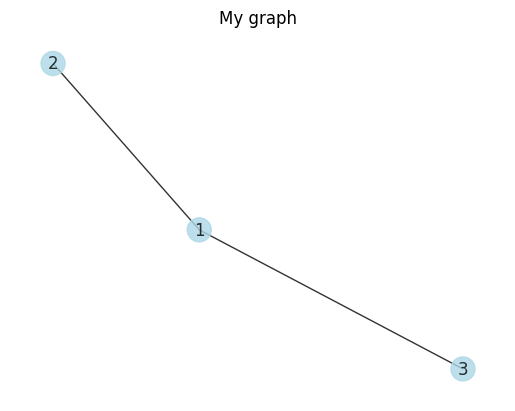

In [5]:
## Correct adjacency list
G = nu.adjacency_list_to_graph({1: {2, 3}, 2: {1}, 3: {1}})
pu.show_graph(G)


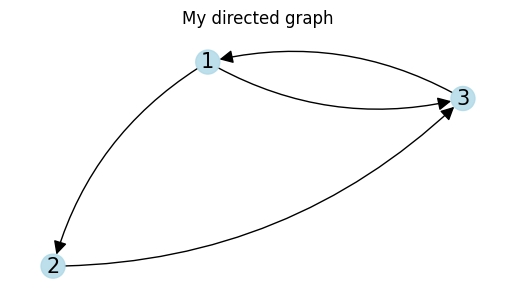

In [6]:
## Directed graph
G = nu.adjacency_list_to_digraph({1: {2, 3}, 2: {3}, 3: {1}})
pu.show_digraph(G)


---

### Writing Tests

We'll sometimes use `pytest` on homework as a way of blending programming with the related mathc concepts. The idea is that you'll create problems where your code should fail and other problems where your code should succeed. I'll try to create homework assignments where you'll need to use the math or formalisms taught in class to create your tests. This will (hopefully) create a learning activity where have to "do the math" in order to write the tests. 

I now want to demonstrate the pattern for doing this so that we're all using a similar structure (which makes assignment creation and assessment feasible for an entire class).


#### Negative Tests

The following code demonstrates a pattern for writing negative tests.

In [7]:
import pytest
from network_utilities import IllegalGraphRepresentation

def test_adjacency_list_graph_creation_failures():
    ########################################
    ## Empty adjacency list negative test ##
    ########################################
    # What I expect
    expected_error_message_empty_list: str = "Adjacency list had no vertices"
    
    # Instantiate adjacency list
    empty_adjacency_list = dict()
    
    # when
    with pytest.raises(IllegalGraphRepresentation ) as exception:
        _ = nu.adjacency_list_to_graph(empty_adjacency_list)

    # then
    assert (
        expected_error_message_empty_list == str(exception.value)
    ) , f"Incorrect error message \"{exception.value}\" for empty adjacency list"
    
    #################################
    ## Missing edges negative test ##
    #################################
    # What I expect
    expected_error_message_missing_edges: str = "Adjacency list for undirected graph does not have all required edges"

    # Instantiate adjacency list
    missing_edges_adjacency_list = {1:{2}, 2:set()}
    
    # when
    with pytest.raises(IllegalGraphRepresentation ) as exception:
        _ = nu.adjacency_list_to_graph(missing_edges_adjacency_list)

    # then
    assert (
        expected_error_message_missing_edges == str(exception.value)
    ) , f"Incorrect error message \"{exception.value}\" for adjacency list that is missing edges"

    # If assertion satisfied
    print("negative tests for adjacency list functions passed")

Run the test

In [8]:
test_adjacency_list_graph_creation_failures()

negative tests for adjacency list functions passed


**Pattern for negative tests:**

- Define a test function named `test_*` (pytest discovers these automatically)

- Use `pytest.raises(ExceptionType)` to assert that a specific exception is raised

- After the `with` block, validate the exception message

- If any assertion fails, pytest reports the failure



**Breaking down `pytest.raises`:**

- `with pytest.raises(IllegalGraphRepresentation) as exc_info:` — Start a context that expects the exception

- Code inside the `with` block should trigger the exception

- If no exception is raised, pytest fails the test

- `exc_info.value` — Access the actual exception object after the `with` block

- `str(exc_info.value)` — Get the error message string



**When to use `pytest.raises`:**

- For formal test files (in the `tests/` directory)

- When you want pytest to manage exception handling

- When multiple assertions need to happen after the exception



**Running tests:**

- From terminal: `pytest tests/` or `pytest tests/test_adjacency_list.py`

- From VS Code: Click the test tube icon in the sidebar

- Pytest discovers files matching `test_*.py` or `*_test.py`



---


#### Positive Tests
We also want _positive tests_ that demonstrate that our code behaves like we want it to. We do basically the same thing as with the negative test, but we don't use the `with pytest.raises` code when we create our graph. The following code demonstrates two positive tests, both of which are in the `test_adjacency_list_graph_creation.py` file. 

In [9]:
def test_adjacency_list_three_vertex_graph_creation():
    ##############################
    ## Three vertex positive test ##
    ##############################
    # What I expect
    expected_vertex_list: list[int] = [1,2,3]
    expected_edge_set: set[tuple[int,int]] = {(1,2), (1,3)}
    
    # Instantiate adjacency list
    adjacency_list: dict[int, set[int]] = {3:{1}, 1:{2,3}, 2:{1}}

    # when
    G = nu.adjacency_list_to_graph(adjacency_list)
    actual_edge_set = set(tuple(sorted(edge)) for edge in G.edges())
    print(G.edges())
    print(actual_edge_set)
    print(expected_edge_set)
    print(expected_edge_set == actual_edge_set)

    # then
    assert expected_vertex_list == sorted(list(G.nodes()))
    assert actual_edge_set == expected_edge_set



Run tests

In [10]:
test_adjacency_list_three_vertex_graph_creation()

[(1, 3), (1, 2)]
{(1, 2), (1, 3)}
{(1, 2), (1, 3)}
True


**Handling undirected graph edges:** In NetworkX, undirected graph edges are stored as tuples, but the order of endpoints can vary. For example, edge (1,2) might be stored as (2,1). To compare edge sets reliably, we normalize each edge by sorting the endpoints: `tuple(sorted(edge))`. This ensures consistent comparison regardless of tuple order.



The print statements above are pedagogical—they show intermediate steps for learning. In production tests, remove them.



Let's now write a positive test for a directed graph.


In [11]:
def test_adjacency_list_three_vertex_directed_graph_creation() -> None:
    ################################
    ## Three vertex positive test ##
    ################################
    # What I expect
    expected_vertex_list: list[int] = [1,2,3]
    expected_edge_set: set[tuple[int,int]] = {(1,2), (1,3), (3,1), (2,1)}
    
    # Instantiate adjacency list
    adjacency_list: dict[int, set[int]] = {3:{1}, 1:{2,3}, 2:{1}}

    # when
    G = nu.adjacency_list_to_digraph(adjacency_list)
    actual_edge_set = set(tuple(edge) for edge in G.edges())
    print(expected_edge_set)
    print(actual_edge_set)
    
    # then
    assert expected_vertex_list == sorted(list(G.nodes()))
    assert actual_edge_set == expected_edge_set

## Run the test
test_adjacency_list_three_vertex_directed_graph_creation()

{(3, 1), (1, 2), (1, 3), (2, 1)}
{(3, 1), (1, 2), (1, 3), (2, 1)}


---

#### Creating test files in the tests directory

Open up the `test_adjacency_list.py` in the `tests` directory and compare the negative tests from that file to the test written above.  Notice that I've split the negative tests for creating an undirected graph from an adjacency list into two different functions, and notice that there are other positive and negative tests.

Assuming that you've implemented all the steps in the `README`, you should be able to click on the test tube icon in VSCode and see all the tests found in the `test_adjacency_list_graph_creation.py` file. 

**Configuring pytest in VS Code**



If clicking the test tube icon doesn't discover or run tests, the Python interpreter may not be configured correctly:



1. Open the **Command Palette** (View → Command Palette)

2. Search for and select **Python: Select Interpreter**

3. Choose the interpreter prefixed with `.venv` (e.g., `./.venv/bin/python`)

4. Refresh or restart VS Code



Once configured, the test tube icon will discover all `test_*.py` files in the `tests/` directory.


---

Create undirected and directed graphs from adjacency matrix

## Adjacency Matrix Representation

An **adjacency matrix** is a square matrix where the element at position $(i, j)$ is 1 if there is an edge between vertices $i$ and $j$, and 0 otherwise.

**For undirected graphs:** The adjacency matrix must be **symmetric**. If $A[i][j] = 1$, then $A[j][i] = 1$. This is because if there's an edge from $i$ to $j$, there's also an edge from $j$ to $i$.

**For directed graphs:** The adjacency matrix need not be symmetric. An entry $A[i][j] = 1$ means there's a directed edge from $i$ to $j$, which is independent of whether an edge exists from $j$ to $i$.

When creating graphs from adjacency matrices, the vertices are automatically numbered starting from 0.

### Error Conditions

Like adjacency lists, graphs created from adjacency matrices must satisfy certain constraints:

1. **Non-empty vertices:** The adjacency matrix must not be empty (must have at least one vertex).
2. **Symmetry (undirected only):** For undirected graphs, the adjacency matrix must be symmetric.

In [12]:
import numpy as np

## Incorrect adjacency matrix (empty)
try:
    _ = nu.adjacency_matrix_to_graph(np.array([]))
    raise AssertionError("Expected IllegalGraphRepresentation to be raised")
except IllegalGraphRepresentation as exc:
    assert str(exc) == "Adjacency matrix had no vertices"
    print("Passed: raised IllegalGraphRepresentation with correct message")


Passed: raised IllegalGraphRepresentation with correct message


In [13]:
## Asymmetric adjacency matrix
try:
    _ = nu.adjacency_matrix_to_graph(np.array([[0, 1], [0, 0]]))
    raise AssertionError("Expected IllegalGraphRepresentation to be raised")
except IllegalGraphRepresentation as exc:
    assert str(exc) == "Adjacency matrix is not symmetric"
    print("Passed: raised IllegalGraphRepresentation with correct message")


Passed: raised IllegalGraphRepresentation with correct message


True


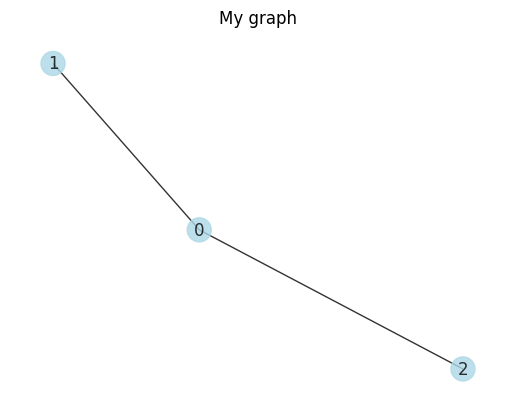

In [14]:
## Undirected graph
A = np.array([[0, 1, 1], [1, 0, 0], [1, 0, 0]])
print(np.array_equal(A, A.T))
G = nu.adjacency_matrix_to_graph(A)
pu.show_graph(G)


### Positive Tests

Now let's create valid graphs from adjacency matrices. We'll demonstrate both undirected and directed cases.

**Testing Symmetry:** Notice the line `print(np.array_equal(A, A.T))` which checks if the matrix is symmetric by comparing it to its transpose $A^T$. For undirected graphs, this should always be `True`.

False


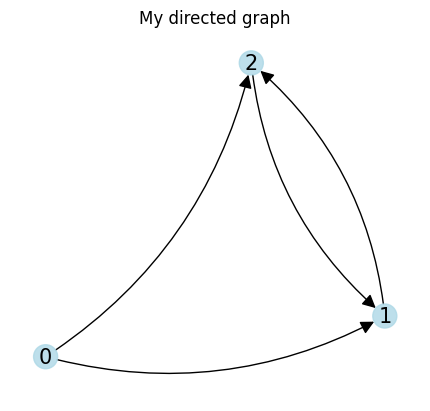

In [15]:
## Directed graph
A = np.array([[0, 1, 1], [0, 0, 1], [0, 1, 0]])
print(np.array_equal(A, A.T))
G = nu.adjacency_matrix_to_digraph(A)
pu.show_digraph(G)


Notice how the adjacency matrix defaults to numbering nodes at 0.